In [1]:
# packages
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd

In [3]:
data = open("D:\Code\python\mat3533\practice01/datacum.txt",  'r')
data = data.readlines()
data = [x.split() for x in data if not x.startswith("#####")]
data = [x[0].split(",") for x in data if not len(x) == 0]
data = np.array(data).astype(int)
data_df = pd.DataFrame(data)
print(data_df)

          0   1   2   3   4   5   6   7   8   9   10
0    1000025   2   5   1   1   1   2   1   3   1   1
1    1002945   2   5   4   4   5   7  10   3   2   1
2    1015425   2   3   1   1   1   2   2   3   1   1
3    1016277   2   6   8   8   1   3   4   3   7   1
4    1017023   2   4   1   1   3   2   1   3   1   1
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   2   3   1   1   1   3   2   1   1   1
695   841769   2   2   1   1   1   2   1   1   1   1
696   888820   4   5  10  10   3   7   3   8  10   2
697   897471   4   4   8   6   4   3   4  10   6   1
698   897471   4   4   8   8   5   4   5  10   4   1

[699 rows x 11 columns]


In [17]:
B_df = data_df.loc[data_df[1] == 2]
B_test_df = B_df[:80]
B_train_df = B_df[80:]

M_df = data_df.loc[data_df[1] == 4]
M_test_df = M_df[:40]
M_train_df = M_df[40:]

train_df = pd.concat([B_train_df, M_train_df])
test_df = pd.concat([B_test_df, M_test_df])
print(test_df)
print(train_df)

         0   1   2   3   4   5   6   7   8   9   10
0   1000025   2   5   1   1   1   2   1   3   1   1
1   1002945   2   5   4   4   5   7  10   3   2   1
2   1015425   2   3   1   1   1   2   2   3   1   1
3   1016277   2   6   8   8   1   3   4   3   7   1
4   1017023   2   4   1   1   3   2   1   3   1   1
..      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
71  1123061   4   6  10   2   8  10   2   7   8  10
73  1125035   4   9   4   5  10   6  10   4   8   1
74  1126417   4  10   6   4   1   3   4   3   2   3
84  1147699   4   3   5   7   8   8   9   7  10   7
85  1147748   4   5  10   6   1  10   4   4  10  10

[120 rows x 11 columns]
          0   1   2   3   4   5   6   7   8   9   10
143  1184184   2   1   1   1   1   2   5   1   1   1
144  1184241   2   2   1   1   1   2   1   2   1   1
145  1184840   2   1   1   3   1   2   0   2   1   1
147  1185610   2   1   1   1   1   3   2   2   1   1
148  1187457   2   3   1   1   3   8   1   5   8   1
..       ...  ..  ..  ..  ..  .. 

In [15]:
train_label = data_df[1]
train_data = data_df.drop(0, axis = 1)
train_data = train_data.drop(1, axis = 1)

In [16]:
test_id = test_df[0]
test_result = test_df[1]
test_result = np.array(test_result)
test_df = test_df.drop(0, axis=1)
test_df = test_df.drop(1, axis=1)

In [7]:
from sklearn.naive_bayes import GaussianNB

model_sk = GaussianNB()

In [8]:
model_sk.fit(train_data, train_label)

GaussianNB()

In [9]:
y_pred = model_sk.predict(test_df)

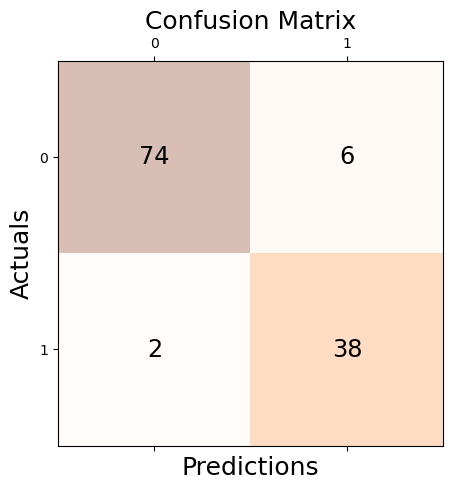

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=test_result, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [11]:
accuracy_score(test_result, y_pred)

0.9333333333333333

In [12]:
recall_score(test_result, y_pred, average=None)

array([0.925, 0.95 ])

In [13]:
precision_score(test_result, y_pred, average=None)

array([0.97368421, 0.86363636])